In [258]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [259]:
# these are all foldedSFS

In [260]:
sfs_df = pd.read_csv('data/results/a_fusca_sfs.tsv', sep = '\t')

In [261]:
sfs_df

,degeneracy,linkage,iton,sum,one,two,three,four
0,0D,A,0,26,13,8,5.0,0.0
1,0D,A,1,18512,5422,7051,2735.0,3304.0
2,0D,A,2,8525,2430,3606,1262.0,1227.0
3,0D,A,3,6216,1789,2263,1240.0,924.0
4,0D,A,4,5898,2045,1745,1537.0,571.0
5,0D,A,5,5334,1774,1669,1156.0,735.0
6,0D,A,6,4791,1532,1390,1361.0,508.0
7,0D,A,7,4706,1434,1379,1367.0,526.0
8,0D,A,8,4836,1502,1301,1613.0,420.0
9,0D,A,9,4577,1660,1510,926.0,481.0


In [276]:
zero_A_sfs = sfs_df[(sfs_df['degeneracy']=='0D') & (sfs_df['linkage']=='A')]['sum'][1:]
four_A_sfs = sfs_df[(sfs_df['degeneracy']=='4D') & (sfs_df['linkage']=='A')]['sum'][1:]
zero_X_sfs = sfs_df[(sfs_df['degeneracy']=='0D') & (sfs_df['linkage']=='X')]['sum'][1:]
four_X_sfs = sfs_df[(sfs_df['degeneracy']=='4D') & (sfs_df['linkage']=='X')]['sum'][1:]

In [286]:
len(zero_A_sfs)

12

In [289]:
def norm_sfs(sfs):
    sfs = sfs.to_numpy(dtype=float)
    sfs/=np.sum(sfs)
    return sfs

In [290]:
zero_A_sfs_norm = norm_sfs(zero_A_sfs)
four_A_sfs_norm = norm_sfs(four_A_sfs)
zero_X_sfs_norm = norm_sfs(zero_X_sfs)
four_X_sfs_norm = norm_sfs(four_X_sfs)

In [291]:
nsamp = len(zero_A_sfs_norm)
sfs_exp = [1/i for i in range(1,nsamp+1)]
sfs_exp /= np.sum(sfs_exp)

In [292]:
len(sfs_exp)

12

In [293]:
a_sfs_df = pd.DataFrame({'degeneracy': ['exp']*nsamp+['0D']*nsamp+['4D']*nsamp,
                         'itons':np.tile(np.arange(1, nsamp+1),3),
                         'sfs': np.concatenate((sfs_exp, zero_A_sfs_norm, four_A_sfs_norm))
                        })

x_sfs_df = pd.DataFrame({'degeneracy': ['exp']*nsamp+['0D']*nsamp+['4D']*nsamp,
                         'itons':np.tile(np.arange(1, nsamp+1),3),
                         'sfs': np.concatenate((sfs_exp, zero_X_sfs_norm, four_X_sfs_norm))
                        })

Text(0.06, 0.5, 'Normalised SFS')

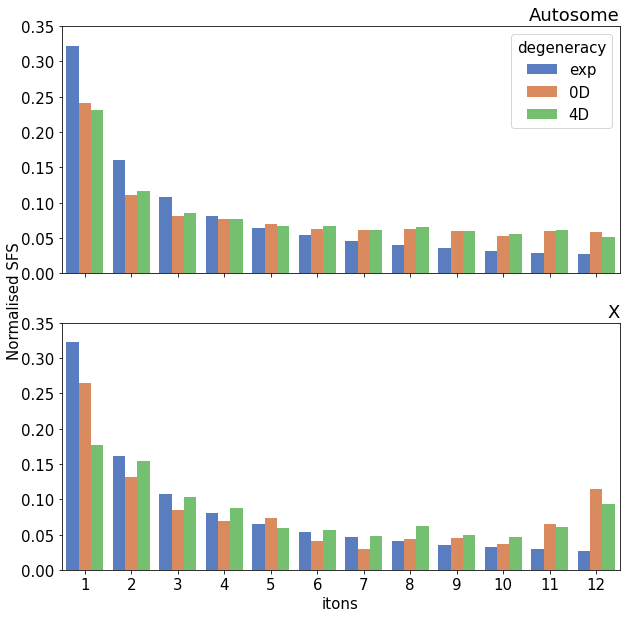

In [294]:
plt.rcParams.update({'font.size':15})
sns.set_palette('muted')

fig, axs = plt.subplots(nrows = 2, figsize = [10,10], sharex=True)

a_ax = axs[0]
x_ax = axs[1]

sns.barplot(data = a_sfs_df,
            x='itons', 
            y = 'sfs', 
            hue = 'degeneracy', 
            ax = a_ax)

sns.barplot(data = x_sfs_df,
            x='itons', 
            y = 'sfs', 
            hue = 'degeneracy', 
            ax = x_ax)

a_ax.set_title('Autosome', loc='right')
a_ax.set_xlabel('')
a_ax.set_ylabel('')
a_ax.set_ylim([0,0.35])

x_ax.set_title('X', loc='right')
x_ax.set_ylabel('')
x_ax.get_legend().remove()
x_ax.set_ylim([0,0.35])

fig.text(0.06, 0.5, 'Normalised SFS', ha='center', va='center', rotation='vertical')

## 1 male sample, so 23 possible haplotypes, i dont think?

In [320]:
## need invariant sites for wattersons theta for total
## does it work for folded sfs?

def get_wattersons_theta(sfs, nsamp):

    wattersons_correction = np.sum([1/i for i in range(1,nsamp+1)])
    sfs_norm=np.sum(sfs)
    wattersons_theta = np.sum(sfs_norm)/(np.sum(sfs) *  wattersons_correction)
    
    return wattersons_theta